LAUREN H
Chapter 1 Homework Problems

Problem 1.1

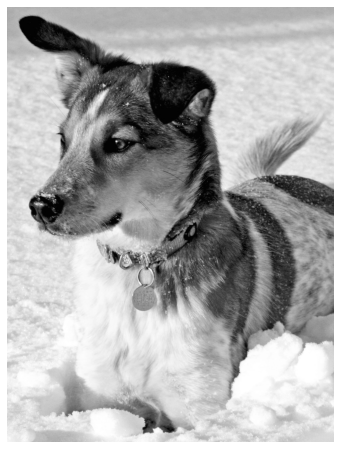

In [86]:
from matplotlib.image import imread    # Importing packages
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg
import os 

plt.rcParams['figure.figsize'] = [16,8]   # Establishing image size once it's loaded

A = imread(os.path.join('..', 'DATA','dog.jpg'))  # Import image from directory
X = np.mean (A,-1)                                 # Grayscale image 

img = plt.imshow(X)                 # Plot Image
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [99]:
# Original Image resolution is 2000 x 1500 
# r max of X = 1500

U, S, VT = np.linalg.svd(X, full_matrices = True)
S = np.diag(S)


UT_U = np.around(np.dot(np.transpose(U[:, 0:10]), U[:,0:10]), decimals=0, out=None)
U_UT = np.dot(U, np.transpose(U))

print(UT_U)
print(U_UT)

[[ 1. -0.  0.  0.  0. -0. -0.  0.  0.  0.]
 [-0.  1. -0. -0.  0. -0. -0.  0.  0.  0.]
 [ 0. -0.  1. -0. -0. -0. -0.  0.  0. -0.]
 [ 0. -0. -0.  1.  0.  0.  0. -0.  0.  0.]
 [ 0.  0. -0.  0.  1.  0.  0. -0. -0.  0.]
 [-0. -0. -0.  0.  0.  1. -0.  0. -0.  0.]
 [-0. -0. -0.  0.  0. -0.  1.  0. -0. -0.]
 [ 0.  0.  0. -0. -0.  0.  0.  1.  0. -0.]
 [ 0.  0.  0.  0. -0. -0. -0.  0.  1.  0.]
 [ 0.  0. -0.  0.  0.  0. -0. -0.  0.  1.]]
[[ 1.00000000e+00  1.80411242e-16 -2.77555756e-17 ...  2.63461128e-17
   4.33680869e-18 -1.37043155e-16]
 [ 1.80411242e-16  1.00000000e+00 -3.19189120e-16 ...  7.11236625e-17
  -4.20670443e-17  4.51028104e-17]
 [-2.77555756e-17 -3.19189120e-16  1.00000000e+00 ... -1.47451495e-17
  -1.07552856e-16 -1.19695920e-16]
 ...
 [ 2.63461128e-17  7.11236625e-17 -1.47451495e-17 ...  1.00000000e+00
  -2.77555756e-17  3.12250226e-17]
 [ 4.33680869e-18 -4.20670443e-17 -1.07552856e-16 ... -2.77555756e-17
   1.00000000e+00  2.77555756e-17]
 [-1.37043155e-16  4.51028104e-17 -1.19

In [101]:
n = np.shape(U_UT)[0]
print(n)
err = np.zeros(n)
for i in range(n):
    U_UT = np.dot(U[:,0:i+1],np.transpose(U[:,0:i+1]))
    err[i] = linalg.norm(U_UT - np.identity(n), 'fro')

plt.semilogy(err)
plt.title('error between UU* and identity')
plt.show()

2000


KeyboardInterrupt: 

PROBLEM 1.2

(2000, 1500)


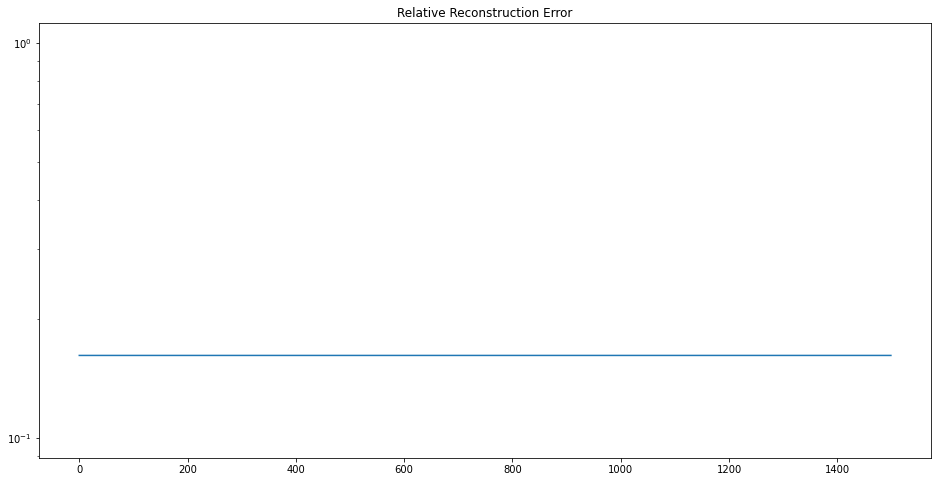

In [ ]:
print(np.shape(X))
l = np.shape(X)[1]

recon_error = np.zeros(l)

U2, S2, VT2 = np.linalg.svd(X, full_matrices = True)

S2 = np.diag(S2)

for j in range(l):
    X_hat = U2[:, :r] @ S[0:r, :r] @ VT2[:r, :]
    recon_error[j] = linalg.norm(X_hat - X, 'fro')


relative_error = recon_error/linalg.norm(X, 'fro')
plt.semilogy(relative_error)
plt.title("Relative Reconstruction Error")
plt.show()
